In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import platform
from autogluon.tabular import TabularDataset, TabularPredictor
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
plt.rcParams['axes.unicode_minus'] == False

c:\Users\ban05\anaconda3\envs\machine_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


False

In [116]:
path = 'processing_data/광주_업종별_전력사용량.csv'
# blackout_df = pd.read_excel(path1)
df = pd.read_csv(path, encoding='cp949')

In [54]:
# # combine year, month, day, and time columns into a single string column
# date_str = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) + '-' + df['day'].astype(str).str.zfill(2) + ' ' + df['hour'].astype(str).str.zfill(2)+'0000'
# date_str
# # convert the string column to datetime format
# df['datetime'] = pd.to_datetime(date_str, format='%Y-%m-%d %H%M%S')

In [117]:
df

,Unnamed: 0,년도,시도,계약구분,고객수,사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,0,202101,광주광역시,주택용,"386,291","200,924,825","22,352,496,686",111.2
1,1,202101,광주광역시,일반용,"94,050","278,464,922","36,025,290,206",129.4
2,2,202101,광주광역시,교육용,630,"32,355,494","3,074,821,310",95.0
3,3,202101,광주광역시,산업용,"6,402","267,717,054","32,272,757,689",120.5
4,4,202101,광주광역시,농사용,"12,017","11,148,705","494,595,520",44.4
...,...,...,...,...,...,...,...,...
163,162,202212,광주광역시,일반용,"99,014","251,968,761","40,126,199,106",159.3
164,163,202212,광주광역시,교육용,629,"31,159,967","3,821,817,926",122.7
165,164,202212,광주광역시,산업용,"6,550","256,259,483","38,670,493,980",150.9
166,165,202212,광주광역시,농사용,"12,753","8,624,110","597,859,534",69.3


In [118]:
df['사용량(kWh)'] = df['사용량(kWh)'].str.replace(',', '').astype(dtype='int64')
df['전기요금(원)'] = df['전기요금(원)'].str.replace(',', '').astype(dtype='int64')


In [119]:
df_p  = df.groupby(['년도'])['사용량(kWh)','전기요금(원)'].mean()
df_p

C:\Users\ban05\AppData\Local\Temp\ipykernel_15088\240316800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_p  = df.groupby(['년도'])['사용량(kWh)','전기요금(원)'].mean()


,사용량(kWh),전기요금(원)
년도,,
202101,1.159806e+08,1.371370e+10
202102,1.096039e+08,1.308629e+10
202103,9.968011e+07,1.070443e+10
202104,9.943603e+07,1.017693e+10
202105,9.425007e+07,9.655822e+09
202106,1.019621e+08,1.191894e+10
202107,1.129922e+08,1.394907e+10
202108,1.252173e+08,1.556793e+10
202109,1.116797e+08,1.228708e+10


In [120]:
df_p['ds'] = df_p.index

In [122]:
df_p.reset_index(inplace=True, drop=True)
df_p

,사용량(kWh),전기요금(원),ds
0,1.159806e+08,1.371370e+10,202101
1,1.096039e+08,1.308629e+10,202102
2,9.968011e+07,1.070443e+10,202103
3,9.943603e+07,1.017693e+10,202104
4,9.425007e+07,9.655822e+09,202105
5,1.019621e+08,1.191894e+10,202106
6,1.129922e+08,1.394907e+10,202107
7,1.252173e+08,1.556793e+10,202108
8,1.116797e+08,1.228708e+10,202109
9,1.008005e+08,1.051683e+10,202110


In [93]:
# df_p.rename(columns={'y':'ds','사용량(kWh)':'y'},inplace=True)

In [123]:
df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y%m')

In [ ]:
df_p = df_p[['ds','y']]

In [125]:
m = Prophet()
m.fit(df_p)
future = m.make_future_dataframe(12, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [100]:
fig = m.plot_components(forecast)


NameError: name 'forecast' is not defined

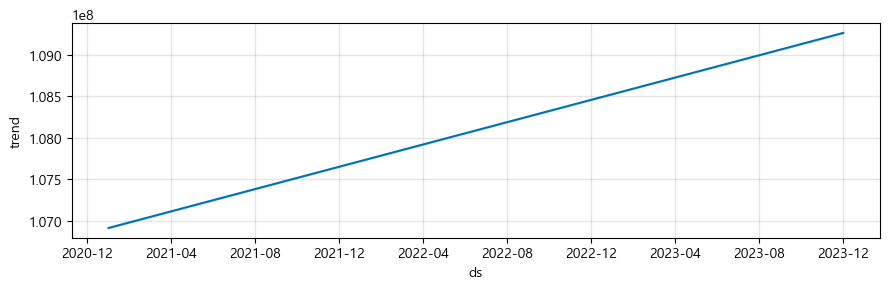

In [115]:
fig = m.plot_components(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


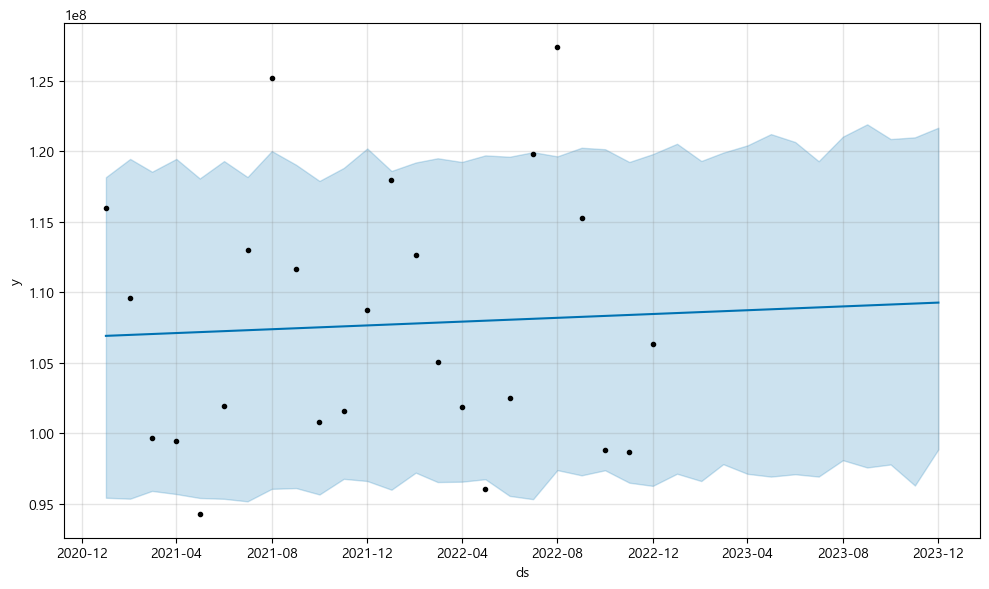

In [114]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df_p)
forecast = m.predict(future)
fig = m.plot(forecast)